# Machine Learning Applied to Multi-Electron Events in Scintillator

Author: **Harrison LaBollita**$^{1,2}$

Contributors: **Nicholas Todoroff**$^{2,3}$, **Jane Kim**$^{2,3}$, **Yani Udiani**$^{2,3}$, **Robert Branson**$^{2,3}$, and **Morten-Hjorth Jensen**$^{2,3}$

$^{1}$Department of Mathematics and Physics, Piedmont College, Demorest, GA $^{2}$National Superconducting Cyclotron Laboratory, East Lansing, MI $^{3}$Department of Physics and Astronomy, Michigan State University, East Lansing, MI

Email: hlabollita0219@lions.piedmont.edu

This [repository](https://github.com/harrisonlabollita/Harrison-LaBollita) contains much more documentation and source code files related to this project.

# Introduction 

This _Jupyter_ notebook serves as an interactive document and compilation of all the successful work that has gone into this machine learning project provided to Morten's theory group by the experimentalist, Sean Liddick. I provide a quick introduction to the problem for context, however for more material on this please go [here](https://github.com/harrisonlabollita/Harrison-LaBollita/tree/master/Machine%20Learning). 

The classical picture of spherical nuclei is far from the reality of the true nuclear structure. Shape coexistence is a nuclear phenomenon, where the nucleus exists in two stable shapes at the same excitation energy [[1]](https://www.europhysicsnews.org/articles/epn/pdf/2001/01/epn01101.pdf). Nuclear properties provide unique information on the impetuses that foster changes to the nuclear structure of rare isotopes. In some neutron-rich nuclei, $0^{+}$ states are predicted to exhibit shape coexistence. Therefore they are compelling to study, but experimentally challenging [[2]](http://iopscience.iop.org/article/10.1088/0954-3899/43/2/024001). At low energies, where the only energetically allowed decay mode is $0^{+} \rightarrow 0^{+}$, conversion electron spectroscopy is the only viable technique to probe their properties.

Sean Liddick's group employs conversion electron spectroscopy to study these transition rates. When a neutron-rich nucleus beta decays, a neutron transforms into a proton and emits an electron ($\beta$). The excited nucleus can then interact electromagnetically with the surrounding orbital electrons. This can result in the ejection of an internal conversion electron ($e^{-}$) from the atom [[3]](https://www.sciencedirect.com/science/article/pii/S0065253908608884). Because this process is essentially simultaneous in time, it is pivotal to differentiate between the electron ($\beta$) emitted from the nucleus and the internal conversion electron ($e^{-}$) emitted from the atom.

This project attempts to use supervised machine learning algorithms as a means to distinguish between one and two electron events and predict the electron(s) corresponding initial position(s) in a scintillator.

**Note**: This notebook has the following dependencies: needs electron data ('BetaScint2DEnergy.csv' and 'BetaScint2DEnergyElectron.csv') and ProcessingData.py, which contains functions used throughout this notebook. The ProcessingData library can be found [here](https://github.com/harrisonlabollita/Harrison-LaBollita/tree/master/Machine%20Learning).

# Electron Events

We want to (i.) distinguish between one and two electron events and (ii.) predict the origin(s) of the electron(s) from within the scintillator. Let us begin by noticing the difference between a one and two electron event to further understand the problem at hand.

In [2]:
# Load electorn data files
import sys
sys.path.append('/Users/harrisonlabollita/Library/Mobile Documents/com~apple~CloudDocs/MSU REU/MSU REU Project/python/')
import ProcessingData as data
filename_1 = '/Users/harrisonlabollita/Library/Mobile Documents/com~apple~CloudDocs/MSU REU/MSU REU Project/BetaScint2DEnergy.csv'
filename_2 = '/Users/harrisonlabollita/Library/Mobile Documents/com~apple~CloudDocs/MSU REU/MSU REU Project/BetaScint2DEnergy2Electron.csv'

grid_1, outputs_1 = data.get_data(filename_1)
grid_2, outputs_2 = data.get_data(filename_2)
print('Finished loading data!')

Finished loading data!


## One and Two Electron events
Below are the different kinds of events that we would like to use supervised machine learning to distinguish between. We also need to train our algorithms to predict where the electron(s) started from within the scintillator. This is denoted by a red circle(s) on the plots.

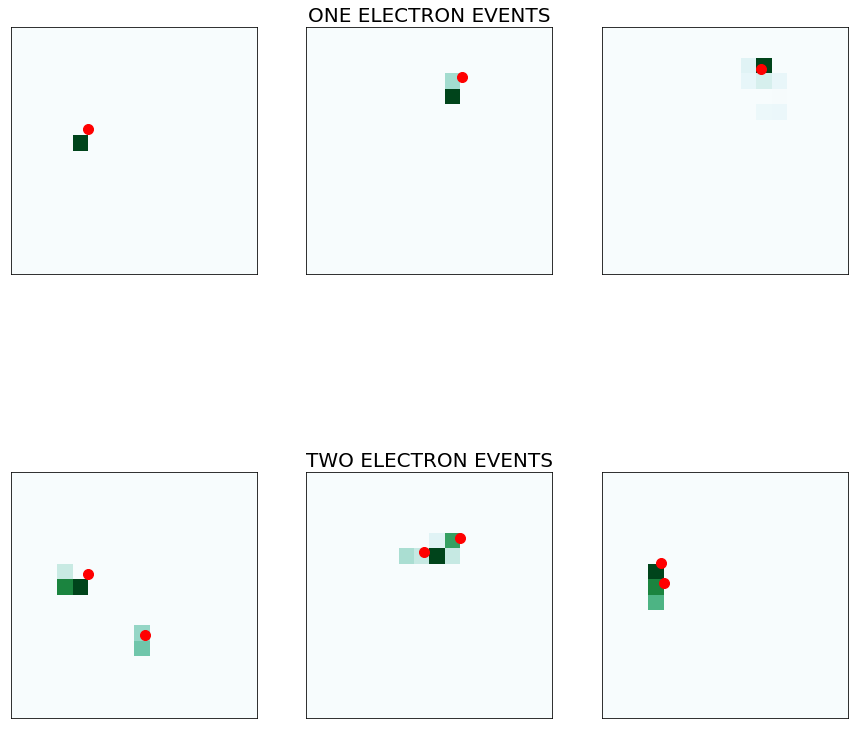

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,3, figsize = (15,15))
ax[0,0].imshow(grid_1[0], cmap='BuGn', origin = 'lower')
ax[0,0].scatter((outputs_1[0][1])/3 + 8, (outputs_1[0][2])/3 + 8, c = 'r', s=100, marker = 'o' )
ax[0,0].axes.get_xaxis().set_visible(False)
ax[0,0].axes.get_yaxis().set_visible(False)

ax[0,1].set_title('ONE ELECTRON EVENTS', fontsize = 20)
ax[0,1].imshow(grid_1[8500], cmap='BuGn', origin = 'lower')
ax[0,1].scatter((outputs_1[8500][1])/3 + 8, (outputs_1[8500][2])/3 + 8, c = 'r', s=100, marker = 'o' )
ax[0,1].axes.get_xaxis().set_visible(False)
ax[0,1].axes.get_yaxis().set_visible(False)

ax[0,2].imshow(grid_1[290118], cmap='BuGn', origin = 'lower')
ax[0,2].scatter((outputs_1[290118][1])/3 + 8, (outputs_1[290118][2])/3 + 8, c = 'r', s=100, marker = 'o' )
ax[0,2].axes.get_xaxis().set_visible(False)
ax[0,2].axes.get_yaxis().set_visible(False)

ax[1,0].imshow(grid_2[0], cmap='BuGn', origin = 'lower')
ax[1,0].scatter((outputs_2[0][1])/3 + 8, (outputs_2[0][2])/3 + 8, c = 'r', s=100, marker = 'o' )
ax[1,0].scatter((outputs_2[0][4])/3 + 8, (outputs_2[0][5])/3 + 8, c = 'r', s=100, marker = 'o' )
ax[1,0].axes.get_xaxis().set_visible(False)
ax[1,0].axes.get_yaxis().set_visible(False)

ax[1,1].set_title('TWO ELECTRON EVENTS', fontsize = 20)
ax[1,1].imshow(grid_2[15], cmap='BuGn', origin = 'lower')
ax[1,1].scatter((outputs_2[15][1])/3 + 8, (outputs_2[15][2])/3 + 8, c = 'r', s=100, marker = 'o' )
ax[1,1].scatter((outputs_2[15][4])/3 + 8, (outputs_2[15][5])/3 + 8, c = 'r', s=100, marker = 'o' )
ax[1,1].axes.get_xaxis().set_visible(False)
ax[1,1].axes.get_yaxis().set_visible(False)

ax[1,2].imshow(grid_2[75], cmap='BuGn', origin = 'lower')
ax[1,2].scatter((outputs_2[75][1])/3 + 8, (outputs_2[75][2])/3 + 8, c = 'r', s=100, marker = 'o' )
ax[1,2].scatter((outputs_2[75][4])/3 + 8, (outputs_2[75][5])/3 + 8, c = 'r', s=100, marker = 'o' )
ax[1,2].axes.get_xaxis().set_visible(False)
ax[1,2].axes.get_yaxis().set_visible(False)

plt.show()

After performing extensive data analyses, we gained valuable insight into the problem at hand. The first piece of informaiton is that 70% of the electrons in the one-electorn case start in the pixel with the highest energy. It was also found that 100% of the time if the electron does not start in the pixel with the highest energy deposited, it started in a neighboring pixel to the one with the highest energy. For the two electron cases, we decided that an event that looked like the one on the far left would be an "easy" two electron event, because it is trivial. We deemed events that looked like the remaining two electron events as "hard". We found that only 15% of the entire two electron data set was made of "hard" cases. This gave us a good idea of how well our machine learning algorithms should perform.

The Python scripts that produce these metrics can be found in the GitHub repository linked [here](https://github.com/harrisonlabollita/Projects/tree/master/MSU%20Machine%20Learning/python_scripts). The files are labeled *electron_densities.py* and *sort_hard_and_easy.py*

# Convolutional Neural Networks

We chose to use convolutional neural networks to combat our problem. Convolutional neural networks (CNN) are a class of deep neural networks optimized for analyzing images. CNNs provide the computer with the ability to see. This will allow us to treat each scintillator event as a visual image, so the computer can see where the electron by looking at all of the non-zero pixels. For more information on convoluational neural networks, see [here](http://cs231n.github.io/convolutional-networks/). We developed our CNN architectures in [Keras](https://keras.io), which is a Python deep learning library.

## Single - Electron Model

The first CNN architecture is designed to predict where the electron started from in the one-electron case. Our input data is the entire scintillator, which is a 16 $\times$ 16 matrix, where non-zero matrix elements correspond to the amount of energy that was deposited into that pixel on the scintillator.

We begin by creating two mutually exclusive datasets. Our training set will be one-third of the $10^{6}$ single electron events we have avaliable. Our testing set or validation set is of size 20000.

In [18]:
import numpy as np

grids_1 = np.array(grid_1)/3060. # Normalize the energy depositions

# MAKE TRAINING AND TESTING SETS

x_train = np.array(grids_1[:333333])
x_train = x_train.reshape(333333,16,16,1)
print('Training set size: %d' %(len(x_train)))

x_test = np.array(grids_1[500000:520000])
x_test = x_test.reshape(20000,16,16,1)
print('Testing set size: %d' %(len(x_test)))

answers=[] # Create the answers (x_0, y_0) for each event
for i in range(len(outputs_1)):
    answers.append([outputs_1[i][1], outputs_1[i][2]])
answers = np.array(answers)

y_train = answers[:333333]
y_test = answers[500000:520000]

Training set size: 333333
Testing set size: 20000


### Build Network
Here we define a function that will contain our CNN. Its inputs will be the training and testing datasets, as well as, the number of epochs.

In [19]:
# BUILD NETWORK
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

def Model(x_train, y_train, x_test, y_test, epochs):
    batch_size = 128
    epochs = epochs
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape= (16,16,1)))
    model.add(Flatten())
    model.add(Dense(512, input_dim = 100, activation = 'relu'))
    model.add(Dense(2, activation='linear'))
    model.compile(loss= 'mse', optimizer='adam', metrics = ['accuracy'])
    history = model.fit(x_train, y_train,
            batch_size= batch_size,
            epochs = epochs,
            verbose = 1, validation_data = (x_test, y_test))

    model.summary()

    return model, history

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Train Network

In [20]:
model, history = Model(x_train, y_train, x_test, y_test, 10)

Train on 333333 samples, validate on 20000 samples
Epoch 1/10
333333/333333 [==============================] - 257s 772us/step - loss: 3.9659 - acc: 0.9531 - val_loss: 1.6116 - val_acc: 0.9559
Epoch 2/10
333333/333333 [==============================] - 245s 735us/step - loss: 1.4419 - acc: 0.9571 - val_loss: 1.2417 - val_acc: 0.9564
Epoch 3/10
333333/333333 [==============================] - 263s 788us/step - loss: 1.2605 - acc: 0.9583 - val_loss: 1.1997 - val_acc: 0.9581
Epoch 4/10
333333/333333 [==============================] - 245s 736us/step - loss: 1.1918 - acc: 0.9593 - val_loss: 1.0319 - val_acc: 0.9574
Epoch 5/10
333333/333333 [==============================] - 234s 702us/step - loss: 1.1378 - acc: 0.9594 - val_loss: 1.1234 - val_acc: 0.9587
Epoch 6/10
333333/333333 [==============================] - 239s 717us/step - loss: 1.0994 - acc: 0.9597 - val_loss: 1.0172 - val_acc: 0.9595
Epoch 7/10
333333/333333 [==============================] - 243s 730us/step - loss: 1.0843 - acc:

### Performance History
Plot the accuracy and loss during training and testing over the ten epochs

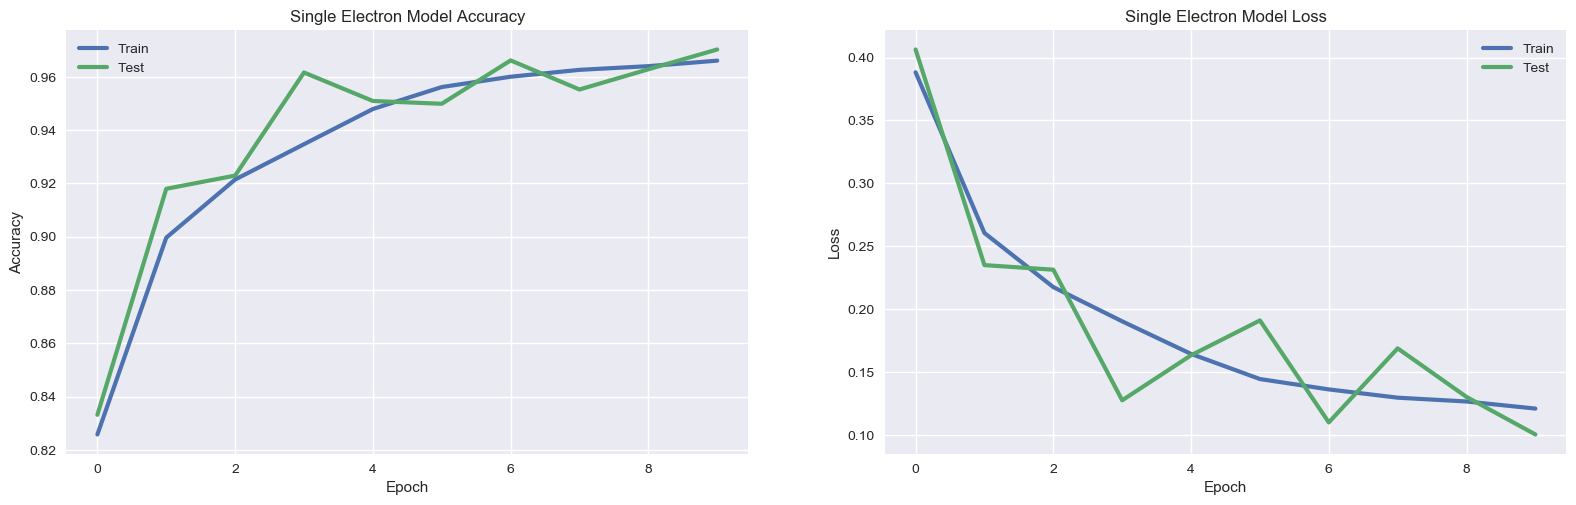

In [92]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1,2)
ax[0].plot(history.history['acc'], linewidth = 3, label = 'Train')
ax[0].plot(history.history['val_acc'], linewidth = 3, label = 'Test')
ax[0].set_title('Single Electron Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc = 'best')
ax[1].plot(history.history['loss'], linewidth = 3, label = 'Train')
ax[1].plot(history.history['val_loss'], linewidth = 3, label = 'Test')
ax[1].set_title('Single Electron Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(loc = 'best')
fig.subplots_adjust(right = 2)
plt.show()

### Predictions
We use our model to make predictions on the testing set. The model is predicting $(x_{0}, y_{0})$ of the electron for a given event.

In [23]:
prediction = model.predict(x_test)

### Example
Below is an example of our model's predictive capabilites. The blue dot is our model's prediction and the red dot is the actual prediction of the electron.

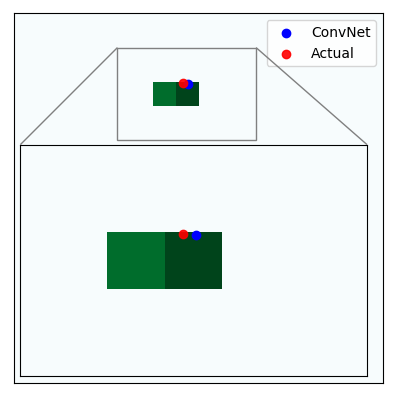

For this example, our prediction was 0.640723 mm away from the actual origin 


In [29]:
plt.style.use('default')
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
fig, ax = plt.subplots()
axins = zoomed_inset_axes(ax, 2.5, loc=3)
ax.imshow(grid_1[500001], cmap='BuGn', origin = 'lower')
ax.scatter((prediction[1][0])/3 + 8, (prediction[1][1])/3 +8, c = 'blue', label = 'ConvNet')
ax.scatter((y_test[1][0])/3 + 8, (y_test[1][1])/3 + 8, c = 'r', alpha =0.9, label = 'Actual')
axins.imshow(grid_1[500001], cmap='BuGn', origin = 'lower')
axins.scatter((prediction[1][0])/3 + 8, (prediction[1][1])/3 +8, c = 'blue', label = 'ConvNet')
axins.scatter((y_test[1][0])/3 + 8, (y_test[1][1])/3 + 8, c = 'r', alpha =0.9, label = 'Actual')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.legend(loc = 'best')
x1, x2, y1, y2 = 4,10,10,14
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.5")
axins.axes.get_xaxis().set_visible(False)
axins.axes.get_yaxis().set_visible(False)
#plt.savefig('ConvNet_prediction.png')
plt.show()
print('For this example, our prediction was %f mm away from the actual origin ' %(data.distance_formula(prediction[1][0], prediction[1][1], y_test[1][0], y_test[1][1])))

### Single-Electron Model vs. Random Guessing
It is imperative to determine if our model is actually learning something during training. So to test this we have developed a random guesser that randomly guesses a point in the pixel with the highest energy. We have chosen this assumption, because we have shown that the electron starts in the pixel with the highest energy 70% of the time. Therefore without machine learning, a person could randomly guess a point inside of this pixel and be relatviely close to the starting location of the electron most of the time.

We begin by finding the error, i.e. the distances between the predicted points/random guesses and the actual points.

In [32]:
sys.path.append('/Users/harrisonlabollita/Library/Mobile Documents/com~apple~CloudDocs/MSU REU/MSU REU Project/python/electron_origins/src/')
import setup_electron_densities as setup
# MODEL ERRORS
errors = []
for i in range(len(prediction)):
    error = data.distance_formula(prediction[i][0], prediction[i][1], y_test[i][0], y_test[i][1])
    errors.append(error)

# RANDOM GUESS
random_answers = outputs_1[:20000]

starting_pixels = setup.starting_pixels()
ranges = setup.ranges()

pixels = data.find_starting_pixel(random_answers)
x_predictions = []
y_predictions = []
for i in range(len(pixels)):
    n = int(pixels[i])
    pixel = starting_pixels[n]
    xmin = ranges[n][0][0]
    xmax = ranges[n][0][1]
    ymin = ranges[n][1][0]
    ymax = ranges[n][1][1]
    x_predict = np.random.randint(xmin, xmax) + np.random.rand()
    y_predict = np.random.randint(ymin, ymax) + np.random.rand()
    while xmax < x_predict < xmin and ymax < ypredict < ymin:
        x_predict = np.random.randint(xmin, xmax) + np.random.rand()
        y_predict = np.random.randint(ymin, ymax) + np.random.rand()
    x_predictions.append(x_predict)
    y_predictions.append(y_predict)

random_errors = []
for i in range(len(random_answers)):
    error = data.distance_formula(x_predictions[i], y_predictions[i], random_answers[i][1], random_answers[i][2])
    random_errors.append(error)

### Error Plots
The following plots were generated:

1. Histogram plot of the error between the predicted/random guess value and the actual value.
2. Log-y histrogram plot showing the our model's "bad" predictions
3. A zoomed histrogram plot restricting the x-axis is 0 to 3mm

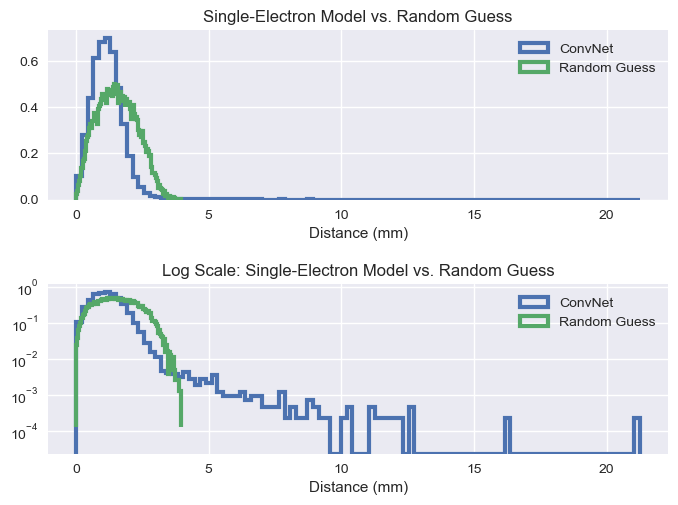

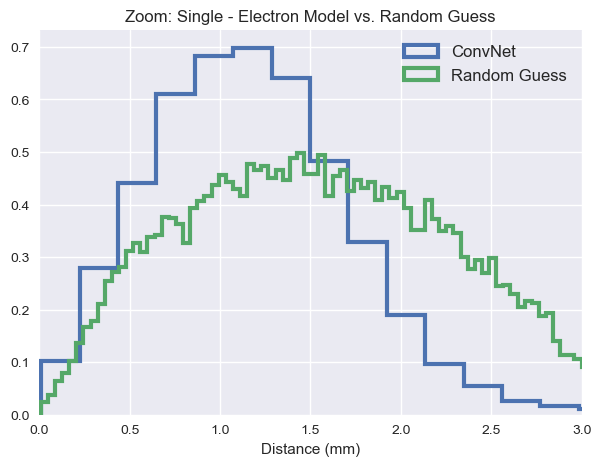

In [33]:

plt.style.use('seaborn')
fig, (ax1,ax3) = plt.subplots(2, 1)
ax1.set_title('Single-Electron Model vs. Random Guess')
ax1.hist(errors, bins = 100, histtype = 'step', normed = True, linewidth = 3, label = 'ConvNet')
ax1.hist(random_errors, bins = 100, histtype = 'step', normed = True, linewidth = 3, label = 'Random Guess')
ax1.legend(loc = 'best', fontsize = 10)
ax1.set_xlabel('Distance (mm)')

ax3.set_title('Log Scale: Single-Electron Model vs. Random Guess')
ax3.hist(errors, bins = 100, histtype = 'step', log =True, normed = True, linewidth = 3,label = 'ConvNet')
ax3.hist(random_errors, bins = 100, histtype = 'step', log = True, normed = True, linewidth = 3, label = 'Random Guess')
ax3.legend(loc = 'best', fontsize = 10)
ax3.set_xlabel('Distance (mm)')
plt.subplots_adjust(hspace = 0.5)
#plt.savefig('Norm and Log Single-Electron Model vs Random Guess.png')
plt.show()

fig, ax = plt.subplots(figsize = (7,5))
ax.set_title('Zoom: Single - Electron Model vs. Random Guess')
ax.hist(errors, bins = 100, histtype = 'step', normed = True, linewidth = 3, label = 'ConvNet')
ax.hist(random_errors, bins = 100, histtype = 'step', normed = True, linewidth = 3, label = 'Random Guess')
ax.set_xlim([0,3])
ax.legend(fontsize = 12)
ax.set_xlabel('Distance (mm)')
#plt.savefig('Zoom: Single-Electron Model vs Random Guess.png',bbox_inches = 'tight')
plt.show()

Our model's error was less than the mean of the random guessing algorithm 77% of the time. This metric was calculated below.

In [37]:
num = np.mean(random_errors)
count = 0
for error in errors:
    if error <= num:
        count +=1
print('%f percent of ConvNet is to the left of the mean %f of our random guess.' %(count/len(errors)*100, num))

76.385000 percent of ConvNet is to the left of the mean 1.555133 of our random guess.


### Metrics
This is a table providing some metrics for our model. We have the average distance between the actual value and predicted, as well, as the minimum and maximum differences. We are also showing the 90$^{th}$, 95$^{th}$, and 99$^{th}$ percentiles. _Note_: All metrics are in millimeters (mm).

|       Method            |**Average**  | **Min**  |**Max**  |  90%  |  95%  | 99%   |
|-------------------------|:-----------:|:--------:|:-------:|:-----:|:-----:|:-----:|
|**Single Electron Model**| 1.2117      |0.011     | 21.253  |1.900  |2.165  |3.293  |
|**Random Guessing**      | 1.555       |0.008     | 3.944   |2.574  | 2.805 |3.218  |

## Multi - Event Model
The second CNN architecture that we developed is to solve the catergorization problem. For a given event we would like to train our model to correctly identify whether the event was a one or two electron event.

We begin by creating a new dataset that contains both one and two electron events. We do this by randomly picking an event from each individual dataset depending if the random number generated is greater than $0.5$. We have labeled the dataset such that a single electron event has label 0 and a one electron event has label 1. (The inconvenience is due to a subtlety in the Keras packages, so we will just have to deal with it.) Our total dataset will contain 200000 events. We will then separate this into mutually exclusive sets for training and testing. 

In [43]:
# CREATE DATASET FROM ONE AND TWO ELECTRON DATA SIZE: 200000 EVENTS
data = []
answers = []
i = 0
while len(data) < 200000:
    num = np.random.rand()
    if num > 0.5:
        data.append(grid_1[i])
        answers.append(0)
    else:
        data.append(grid_2[i])
        answers.append(1)
    i +=1
    
data = np.array(data)/3060. # Normalize the dataset

### Build Network

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# ORGANIZE DATASET INTO TRAINING AND TESTING DATA
num_classes = 2
x_train = data[:150000] # 150000 training events
x_train = x_train.reshape(150000,16,16,1)
y_train = np.array(answers[:150000])

x_test = data[150000:] # 50000 testing events
x_test = x_test.reshape(50000,16,16,1)
y_test = np.array(answers[150000:])

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# DEFINE CNN MODEL
def Model(x_train, y_train, x_test, y_test, epochs):
    batch_size = 128
    epochs = epochs
    num_classes = 2 # 0 for one electron event, 1 for two electron event
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape= (16,16,1)))
    model.add(Conv2D(64, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(loss= keras.losses.categorical_crossentropy,
                    optimizer = keras.optimizers.Adadelta(),
                    metrics = ['accuracy'])
    history = model.fit(x_train, y_train,
                batch_size= batch_size,
                epochs = epochs,
                verbose = 1, validation_data = (x_test, y_test))
    return model, history

### Train Network

In [45]:
model, history = Model(x_train, y_train, x_test, y_test, 10)

Train on 150000 samples, validate on 50000 samples
Epoch 1/10
150000/150000 [==============================] - 133s 885us/step - loss: 0.3883 - acc: 0.8258 - val_loss: 0.4064 - val_acc: 0.8332
Epoch 2/10
150000/150000 [==============================] - 132s 881us/step - loss: 0.2605 - acc: 0.8997 - val_loss: 0.2350 - val_acc: 0.9180
Epoch 3/10
150000/150000 [==============================] - 119s 796us/step - loss: 0.2175 - acc: 0.9215 - val_loss: 0.2314 - val_acc: 0.9230
Epoch 4/10
150000/150000 [==============================] - 117s 782us/step - loss: 0.1903 - acc: 0.9347 - val_loss: 0.1276 - val_acc: 0.9616
Epoch 5/10
150000/150000 [==============================] - 118s 784us/step - loss: 0.1644 - acc: 0.9479 - val_loss: 0.1634 - val_acc: 0.9510
Epoch 6/10
150000/150000 [==============================] - 123s 822us/step - loss: 0.1445 - acc: 0.9562 - val_loss: 0.1911 - val_acc: 0.9499
Epoch 7/10
150000/150000 [==============================] - 119s 792us/step - loss: 0.1362 - acc:

### Evaluate Model

In [46]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss %.2f' %(score[0]))
print('Test accuracy %.5f' %(score[1]))

Test loss 0.10
Test accuracy 0.97028


### Performance History

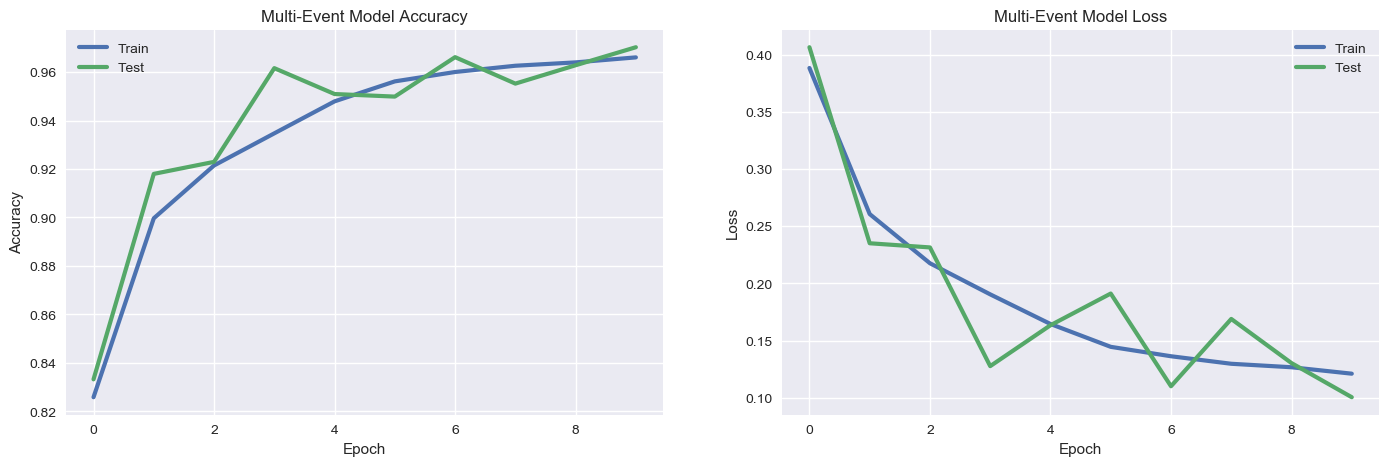

In [49]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1,2, figsize = (7,5))
ax[0].set_aspect('auto')
ax[0].plot(history.history['acc'], linewidth = 3, label = 'Train')
ax[0].plot(history.history['val_acc'],linewidth = 3, label = 'Test')
ax[0].set_title('Multi-Event Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc = 'best')
ax[1].set_aspect('auto')
ax[1].plot(history.history['loss'], linewidth = 3, label = 'Train')
ax[1].plot(history.history['val_loss'],linewidth = 3, label = 'Test')
ax[1].set_title('Multi-Event Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(loc = 'best')
fig.subplots_adjust(right = 2)
#plt.savefig('Multi-Event Model.png', bbox_inches = 'tight')
plt.show()

### Example

In [50]:
prediction = model.predict(x_test)

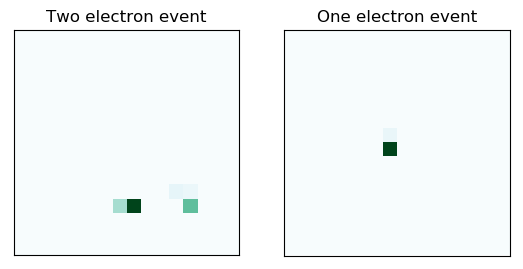

In [84]:
plt.style.use('default')
fig, ax = plt.subplots(1,2)
ax[0].set_title('Two electron event')
ax[0].imshow(data[9], cmap='BuGn', origin = 'lower')
ax[0].axes.get_xaxis().set_visible(False)
ax[0].axes.get_yaxis().set_visible(False)
ax[1].set_title('One electron event')
ax[1].imshow(data[11], cmap = 'BuGn', origin = 'lower')
ax[1].axes.get_xaxis().set_visible(False)
ax[1].axes.get_yaxis().set_visible(False)
plt.show()

In [82]:
print('Event 9 in data is a %d electron event. Our model predicted the probability to be %s'%(answers[9]+1, str(prediction[9])))
print('Event 11 in data is a %d electron event. Our model predicted the probability to be %s' %(answers[11]+1, str(prediction[11])))

Event 9 in data is a 2 electron event. Our model predicted the probability to be [0.01227101 0.98772895]
Event 11 in data is a 1 electron event. Our model predicted the probability to be [0.9826361  0.01736391]


So we can see that our model correctly identified event 9 in our testing set as a two electron event with 0.99% certainty, and for event 11 our model predicted it to be a one electron event with 0.98% certainity. As shown above in the **Evaluate** section, our model achieved a total accuracy score of 97%.

# Conclusion 
With the implementation of machine learning techniques, we were able to successfully train a convolutional neural network (CNN) to distinguish between a one and two electron event. Furthermore, we successfully trained a CNN to predict the origin of the electron for one electron events. However, our model's performance was only marginally better than the random guessing. Therefore, a proper uncertainty quantification needs to be explored. This technique will be generalized to predict the origins of the electrons in the multi-event case and their respective initial energies. These models were trained and tested on simulated data provided by Sean Liddick, so they will need to be tested with a noisy dataset. Once these models are completely generalized, they can then be applied to real experimental data. If they perform well on the experimental data, then machine learning will be a viable data analysis technique for the Sean Liddick group and conversion electron spectroscopy in general.